In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import pathlib
import re
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt

symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
symbols_list.remove('scbtc') # bad

returns_folder_name = "full_returns"
    
ts_list = []
for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

In [2]:
all_returns_df

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000072,0.000000,0.000378,0.000000,0.000000,-0.000569,0.000000,-0.000234,0.000000,-0.001148,...,0.000891,0.000000,0.000000,0.000000,0.000264,-0.000883,0.000522,0.000312,-0.000095,0.000251
2,0.000350,0.000379,0.000033,-0.003975,0.000000,0.000130,0.000546,-0.000003,-0.000905,0.000108,...,-0.000170,-0.000395,0.000000,0.000000,-0.000529,-0.003186,0.000000,-0.000312,-0.000477,-0.000754
3,0.000881,-0.001138,0.000099,-0.000909,0.000000,0.000211,0.000546,0.000665,0.000000,0.000000,...,0.000509,0.000615,0.000000,0.000000,-0.002117,0.001948,-0.000522,0.000192,0.000191,0.000251
4,-0.001195,-0.000759,-0.000033,0.004536,0.000000,-0.000340,0.000273,-0.000402,-0.000453,-0.000826,...,0.000254,0.001711,0.000000,0.000000,0.000000,0.000708,-0.000522,0.000336,0.000191,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578235,0.000000,0.000249,-0.000269,0.000000,0.000037,-0.000217,-0.002242,0.000000,0.000000,-0.000393,...,0.000964,0.000000,-0.001765,0.000341,0.000000,-0.000709,-0.001441,-0.001328,-0.000748,-0.001132
1578236,0.000150,0.000498,-0.000297,0.000000,0.000211,0.000430,0.000000,0.000000,0.000000,0.000000,...,-0.001227,-0.000330,-0.000353,0.000000,0.000000,0.000000,-0.006446,0.000443,-0.001248,0.000000
1578237,-0.000898,-0.000996,0.000104,-0.001651,0.000072,-0.000487,-0.001123,0.000000,-0.000727,-0.000197,...,-0.000965,-0.003635,-0.001769,0.000341,-0.001114,-0.002487,0.002373,-0.001994,0.000000,0.000000
1578238,0.000250,0.000747,0.000338,0.000661,-0.000234,-0.000052,0.001123,0.000000,0.000000,0.000589,...,0.000000,0.001984,0.000354,0.000000,0.000000,0.000711,0.001447,0.000665,-0.003502,0.000000


In [10]:
increment = 1440
daily_returns = all_returns_df.groupby(all_returns_df.index // increment).sum()
date = all_returns_df.index.to_series().apply(lambda x: dt.datetime(2019, 5, 1) + dt.timedelta(days=x))


In [12]:
daily_returns = pd.concat([daily_returns, date], axis=1)

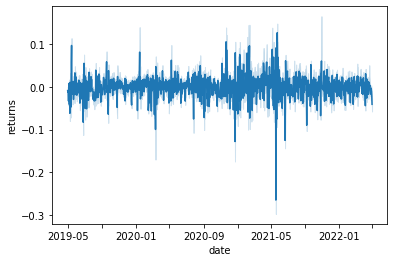

In [14]:
daily_returns.rename(columns={0: 'date'}, inplace=True)
molten = daily_returns.melt('date', var_name='assets', value_name='returns')
plt = sns.lineplot(data=molten, x='date', y='returns')
for i, label in enumerate(plt.xaxis.get_ticklabels()):
    if i % 2 != 0:
        label.set_visible(False)

In [39]:
all_returns_df.groupby(all_returns_df.index % ticks).gr

AttributeError: 'DataFrameGroupBy' object has no attribute 'group'

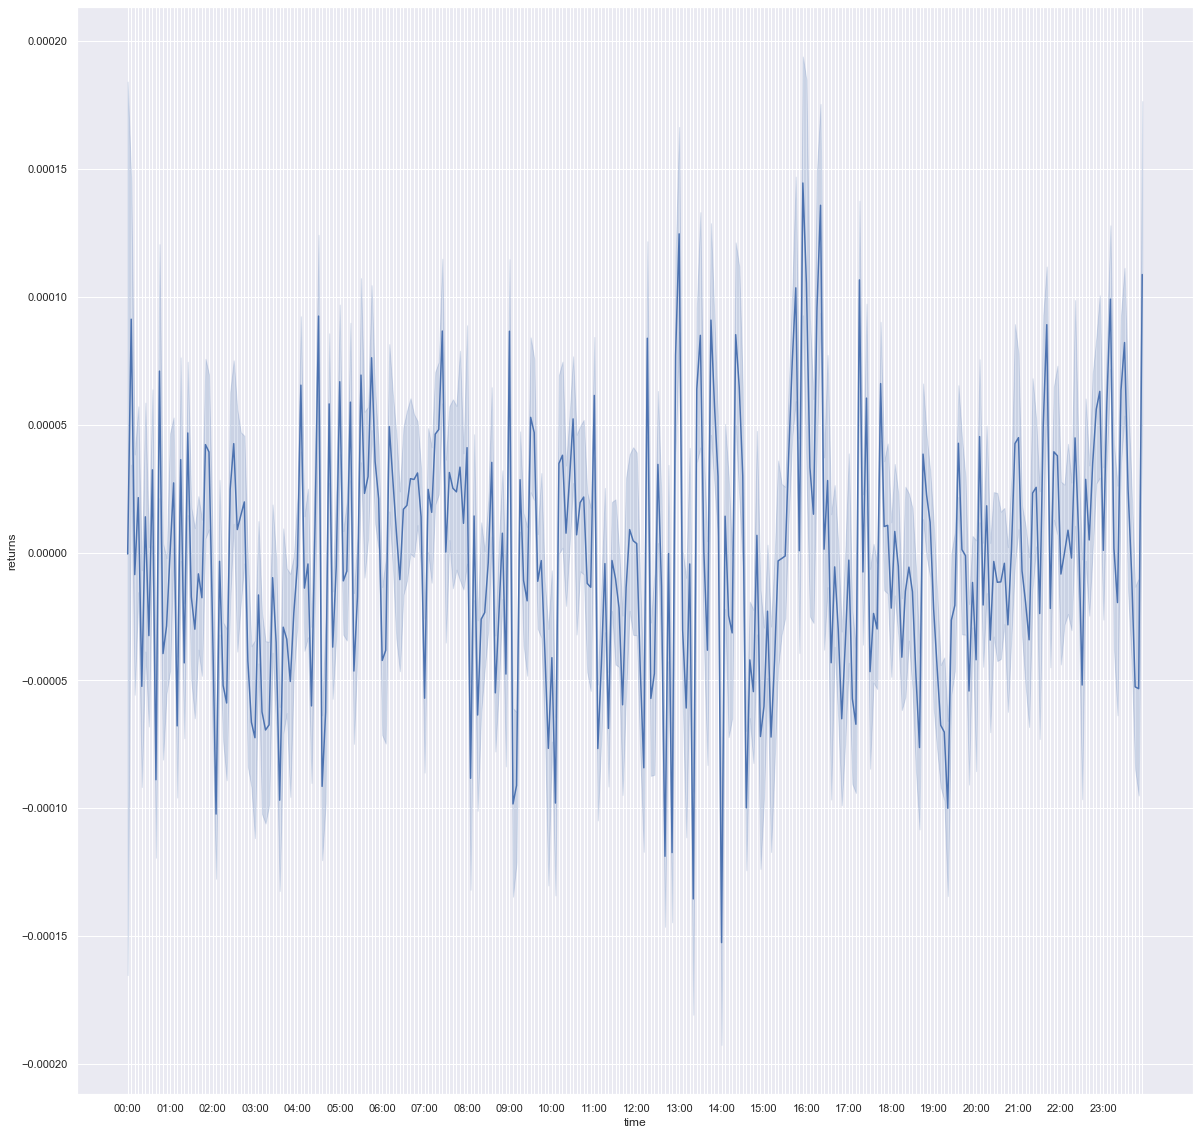

In [57]:
sns.set_context('paper')
sns.set(rc={'figure.figsize':(20,20)}) 
increment = 5
ticks = 1440 / increment
incremental_returns = all_returns_df.groupby(all_returns_df.index // increment).sum()
diurnal_returns = incremental_returns.groupby(incremental_returns.index % ticks).mean()
time_of_day = (diurnal_returns.index.to_series() * increment * 60).astype(int).apply(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%H:%M'))
timed_diurnal_returns = pd.concat([diurnal_returns, time_of_day], axis=1)
timed_diurnal_returns.rename(columns={0: 'time'}, inplace=True)
molten = timed_diurnal_returns.melt('time', var_name='assets', value_name='returns')
plt = sns.lineplot(data=molten, x='time', y='returns')
if increment < 60:
    for i, label in enumerate(plt.xaxis.get_ticklabels()):
        if i % int(60 / increment) != 0:
            label.set_visible(False)

In [ ]:
diurnal_returns

In [43]:
diurnal_returns.loc[0].mean() # 2.25 x 10^(-4)

0.00022514271862535002

In [44]:
all_returns_df.loc[0::1440].mean(axis=0).mean()

0.00022514271862535002

In [55]:
diurnal_returns.abs().mean().mean()

3.256456439326411e-05